## K最近鄰 - K-nearest neightbor classifer, KNN  

## 1 載入資料
同樣兩個欄位和五十筆後資料。資料檢查和探索在之前有演示，故省去示範。

In [ ]:
#01
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rcParams['font.sans-serif'] = ['KaiTi'] # 指定預設字體
plt.rcParams['axes.unicode_minus'] = False # 解決保存影像是負號'-'顯示為方塊的問題
%config InlineBackend.figure_format = 'retina'
import warnings
warnings.filterwarnings('ignore')

from sklearn.datasets import load_iris
iris = load_iris()
df = pd.DataFrame(iris['data'], columns=iris['feature_names'])
df['target'] = iris['target']
df = df[['sepal width (cm)', 'petal length (cm)','target']]
df = df.iloc[50:]
df.head()

,sepal width (cm),petal length (cm),target
50,3.2,4.7,1
51,3.2,4.5,1
52,3.1,4.9,1
53,2.3,4.0,1
54,2.8,4.6,1


In [ ]:
#02
X = df.drop('target', axis=1)
y = df['target']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   test_size=0.33, random_state=42)

In [ ]:
# 03
from sklearn.neighbors import KNeighborsClassifier
# 初始物件
model = KNeighborsClassifier()
# 機器學習
model.fit(X_train, y_train)
# 正確率的預測，model.score提供了簡便的正確率輸出方式
model.score(X_test, y_test)

0.8787878787878788

In [ ]:
# 04
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
model_pl = make_pipeline(StandardScaler(),
                         KNeighborsClassifier())
model_pl.fit(X_train, y_train)
model_pl.score(X_test, y_test)

0.8787878787878788

In [ ]:
# 05
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
y_pred = model_pl.predict(X_test)
print('正確率：', accuracy_score(y_test, y_pred).round(2))
print('混亂矩陣')
print(confusion_matrix(y_test, y_pred))
print('綜合報告')
print(classification_report(y_test, y_pred))

正確率： 0.88
混亂矩陣
[[17  2]
 [ 2 12]]
綜合報告
              precision    recall  f1-score   support

           1       0.89      0.89      0.89        19
           2       0.86      0.86      0.86        14

    accuracy                           0.88        33
   macro avg       0.88      0.88      0.88        33
weighted avg       0.88      0.88      0.88        33



In [ ]:
# 08
accs = []
for n in range(3,8):
    model_pl = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=n))
    model_pl.fit(X_train, y_train)
    print(f'鄰居數{n}，整體正確率：{model_pl.score(X_test, y_test).round(2)}')

鄰居數3，整體正確率：0.85
鄰居數4，整體正確率：0.82
鄰居數5，整體正確率：0.88
鄰居數6，整體正確率：0.85
鄰居數7，整體正確率：0.88


In [ ]:
# 09
iris = load_iris()
df = pd.DataFrame(iris['data'], columns=iris['feature_names'])
df['target'] = iris['target']
df = df.iloc[50:]
# 資料分割
X = df.drop('target', axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   test_size=0.33, random_state=42)
# 羅吉斯迴歸
from sklearn.linear_model import LogisticRegression
model_pl_lr = make_pipeline(StandardScaler(),
                            LogisticRegression(solver='liblinear'))
model_pl_lr.fit(X_train, y_train)
print(f'羅吉斯迴歸正確率{model_pl_lr.score(X_test, y_test).round(3)}')
# KNN
model_pl_knn = make_pipeline(StandardScaler(), KNeighborsClassifier())
model_pl_knn.fit(X_train, y_train)
print(f'KNN正確率{model_pl_knn.score(X_test, y_test).round(3)}')

羅吉斯迴歸正確率0.939
KNN正確率0.909


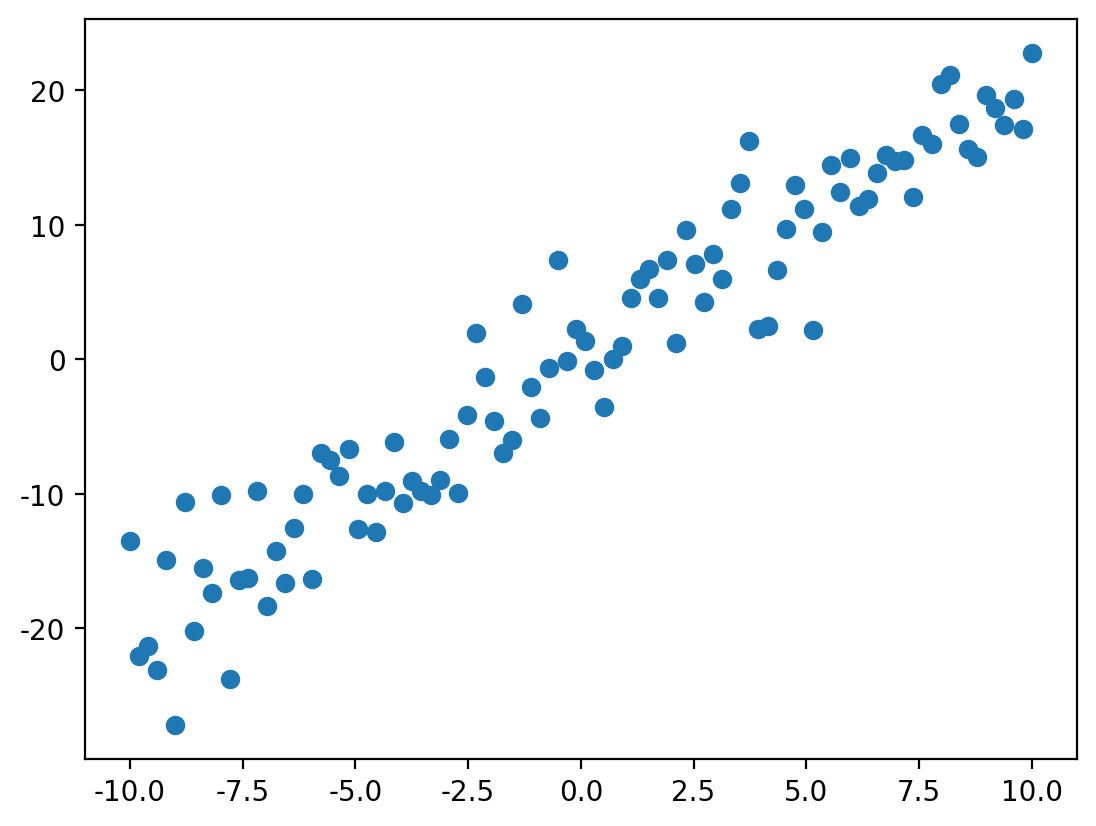

In [ ]:
# 10
np.random.seed(1)
x = np.linspace(-10, 10, 100)
y = 2 * x + 4*np.random.randn(100)
df_pca = pd.DataFrame(zip(x,y), columns=['x0','x1'])
plt.scatter(x, y);

In [ ]:
# 11
from sklearn.decomposition import PCA
pca = PCA(n_components=1)
X_pca = pca.fit_transform(df_pca)
X_pca[:5]

array([[16.64465063],
       [24.34275306],
       [23.58673821],
       [25.12086528],
       [17.60504644]])

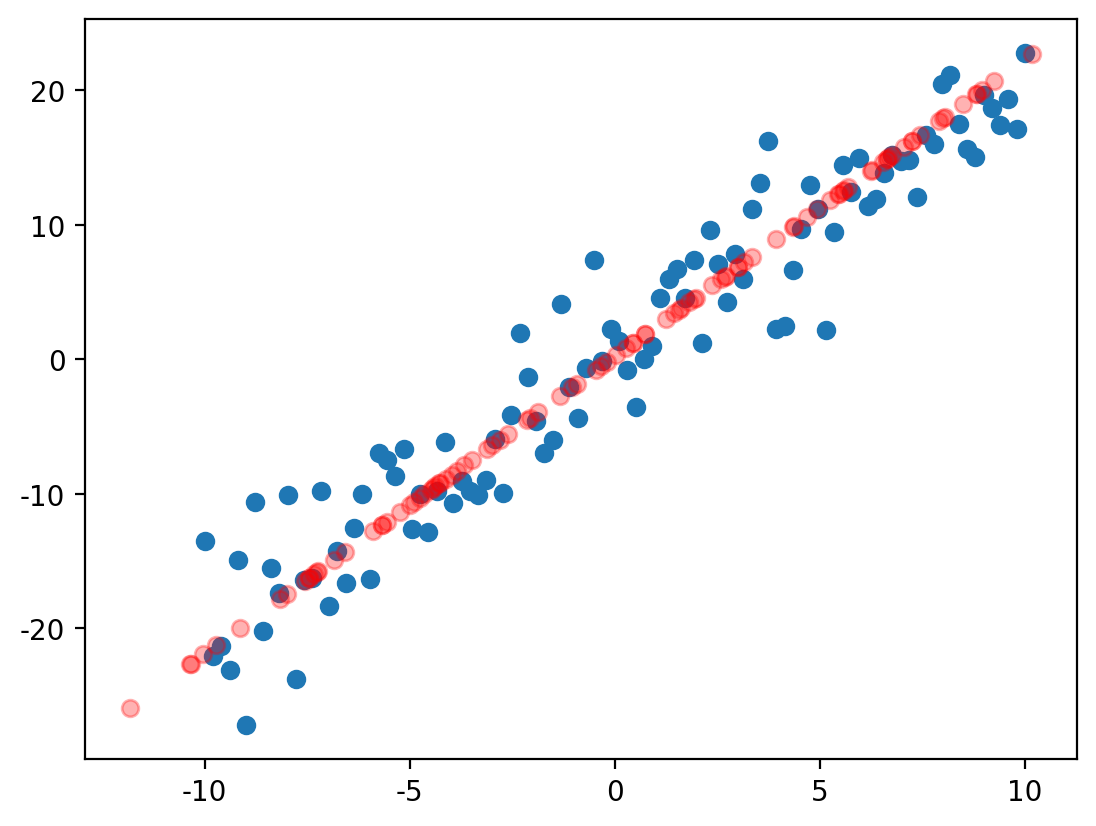

In [ ]:
# 12
# 原本資料
plt.scatter(x, y)
# 將X_pca轉到原本的資料維度
X_new = pca.inverse_transform(X_pca)
plt.scatter(X_new[:,0], X_new[:,1], c='r', alpha=0.3);

In [ ]:
# 13
print(f'PCA的轉換係數：{pca.components_}')
xy_0 = np.array([x[0],y[0]])
print(f'第一筆原始資料：{xy_0}')
# 進行內積
print(f'自行運算的內積結果：{np.sum(pca.components_ * xy_0)}')
print(f'主成分的第一筆資料：{X_pca[0]}')

PCA的轉換係數：[[-0.41212534 -0.91112716]]
第一筆原始資料：[-10.         -13.50261855]
自行運算的內積結果：16.42385589968553
主成分的第一筆資料：[16.64465063]


In [ ]:
# 14
model_pl = make_pipeline(StandardScaler(),
                         PCA(n_components=2),
                         KNeighborsClassifier())
model_pl.fit(X_train, y_train)
y_pred = model_pl.predict(X_test)
print('整體正確率:',accuracy_score(y_test, y_pred).round(2))

整體正確率: 0.85


In [ ]:
# 15
from sklearn.feature_selection import SelectKBest, f_classif
selector = SelectKBest(f_classif, k=2)
selector.fit(X_train, y_train)
selector.get_support()

array([False, False,  True,  True])

In [ ]:
# 16
X_test.columns[selector.get_support()]

Index(['petal length (cm)', 'petal width (cm)'], dtype='object')

In [ ]:
# 17
model_pl = make_pipeline(StandardScaler(),
                        SelectKBest(f_classif, k=2),
                        KNeighborsClassifier())
model_pl.fit(X_train, y_train)
y_pred = model_pl.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print('整體正確率:',accuracy_score(y_test, y_pred).round(2))

[[19  0]
 [ 2 12]]
整體正確率: 0.94
